### Random forest

May 29, 2025

Lorena Lopez Dominguez

kernel: base (Python 3.12.8)

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import os # to select directory

In [2]:
# Set working directory
base_dir = '/Users/Lore/Desktop/brainhack/project/BrainHack-Project-'
data_dir = os.path.join(base_dir, 'results')
os.chdir(base_dir) 

In [5]:
# import features data + metadata for all participants
featuredf = pd.read_table('results/within_module_z_all_merged.csv', sep=',')

In [6]:
# check variables type
featuredf.dtypes

ID          object
AGE          int64
SEXm1f2      int64
subID       object
MHAM_16      int64
            ...   
ROI_416    float64
ROI_417    float64
ROI_418    float64
ROI_419    float64
ROI_420    float64
Length: 426, dtype: object

In [7]:
featuredf["SEXm1f2"].unique() # two classes 2, 1
featuredf["MHAM_16"].unique() # one class 1
featuredf["MHAM_85"].unique() # two classes 1, 0

array([1, 0])

In [8]:
# Select predictors (excluding the column we will use for classification)
# Exclude columns
columns_to_exclude = ['MHAM_16', 'ID', 'subID', 'MHAM_85']
predictors = featuredf.drop(columns=columns_to_exclude)
predictors

,AGE,SEXm1f2,ROI_1,ROI_2,ROI_3,ROI_4,ROI_5,ROI_6,ROI_7,ROI_8,...,ROI_411,ROI_412,ROI_413,ROI_414,ROI_415,ROI_416,ROI_417,ROI_418,ROI_419,ROI_420
0,55,2,0.907017,0.959055,-0.759582,-1.841531,-3.322213,-0.404747,-0.139861,-1.085814,...,0.733345,1.128622,0.983907,0.006201,-2.023348,-1.001533,0.528675,0.658040,1.004484,-1.625119
1,56,2,0.768322,1.322233,1.269484,1.176818,1.005268,-0.417105,0.688491,-0.932507,...,0.737977,0.403230,0.968062,1.268243,-1.383226,-0.629303,0.696450,0.295665,-1.342298,-0.049515
2,57,2,-0.283480,0.986525,-1.073373,-0.373453,-2.607050,-0.945196,0.033486,-0.459376,...,0.298294,-0.059490,0.762581,0.042037,-1.915825,0.676998,0.339826,0.287274,0.146074,-0.694731
3,23,1,1.068873,1.645765,0.614028,-1.008411,-0.944416,-0.412363,-3.375303,-0.519383,...,-0.049603,1.014534,1.067931,-0.129021,-2.367483,-0.444530,1.437098,0.751130,0.255546,-0.599228
4,21,1,1.214974,1.569516,-0.549688,-0.706602,-2.323196,-0.863733,-1.944813,-0.554194,...,0.617808,1.078913,-1.100800,0.250356,0.219861,0.802597,-0.113474,0.937473,0.113263,-0.323651
5,22,1,0.570954,0.944831,-0.655662,-0.568149,-2.067747,-2.950372,-0.476332,-0.259461,...,0.734616,0.386672,1.625113,-1.235900,0.892166,0.655814,1.122529,-0.131031,-1.047038,-1.853547
6,60,2,0.121654,0.941697,-1.688917,-0.568319,-0.745962,0.326897,-2.165688,0.712686,...,0.562934,-0.051570,0.585447,1.005820,-0.262486,0.686666,0.713356,0.217558,-1.392503,-2.131971
7,61,2,0.288624,-0.048998,-1.660508,-0.784944,-1.321316,-0.703341,0.743586,0.428172,...,0.278401,1.198402,1.117334,-0.425323,-1.199482,-0.898148,0.961299,-0.073216,-0.899992,-0.459123
8,61,2,-0.783555,0.541264,-1.417810,-2.486690,-0.034796,0.672693,-2.092132,-0.294243,...,0.505863,-0.139883,1.254389,0.973886,-1.107997,0.600575,0.717309,-0.308227,-2.224719,-0.469842
9,39,2,0.115947,-0.220318,-0.694340,-0.221029,-2.636338,-0.026508,-1.363428,0.666301,...,0.416545,0.456437,1.268036,0.899043,-1.748457,0.164735,0.682323,0.507721,0.239542,-1.464483


In [9]:
# Standardize the predictors
# Initialize the StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Scale all the features in the dataset and create a new DataFrame with scaled features
predictors_standardized = pd.DataFrame(scaler.fit_transform(predictors), columns=predictors.columns)

# Display the head of the standardized predictors
print(predictors_standardized.head())

        AGE   SEXm1f2     ROI_1     ROI_2     ROI_3     ROI_4     ROI_5  \
0  0.936364  0.534522  0.688063  0.517450 -0.274052 -1.976475 -1.465032   
1  1.009433  0.534522  0.529348  1.300106  1.782060  1.863486  2.191689   
2  1.082501  0.534522 -0.674283  0.576646 -0.592025 -0.108778 -0.860720   
3 -1.401839 -1.870829  0.873284  1.997324  1.117867 -0.916574  0.544207   
4 -1.547977 -1.870829  1.040475  1.833005 -0.061360 -0.532611 -0.620863   

      ROI_6     ROI_7     ROI_8  ...   ROI_411   ROI_412   ROI_413   ROI_414  \
0  0.133746  0.470776 -1.092046  ...  1.295101  1.054632 -0.013319 -0.125866   
1  0.119913  1.176103 -0.873134  ...  1.300050  0.032958 -0.038730  1.356462   
2 -0.471212  0.618378 -0.197533  ...  0.830354 -0.618757 -0.368256 -0.083776   
3  0.125221 -2.284148 -0.283219  ...  0.458711  0.893945  0.121428 -0.284691   
4 -0.380025 -1.066110 -0.332927  ...  1.171677  0.984620 -3.356529  0.160906   

    ROI_415   ROI_416   ROI_417   ROI_418   ROI_419   ROI_420  
0 -1

In [10]:
# Split the dataset
X = predictors_standardized
y = featuredf[['MHAM_85']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
# Step 2: Train a Random Forest Model (Before Feature Selection)
from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy_before = rf.score(X_test, y_test)
print(f'Accuracy before feature selection: {accuracy_before:.2f}')

/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy before feature selection: 0.71


In [12]:
# Step 3: Perform Feature Selection Using Random Forest
# Extract feature importances
importances = rf.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)

# Select top N features (example selecting top 10 features)
top_features = feature_importance_df['Feature'][:20].values
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

     Feature  Importance
157  ROI_156    0.015707
259  ROI_258    0.015410
183  ROI_182    0.013440
23    ROI_22    0.012370
70    ROI_69    0.012279
..       ...         ...
417  ROI_416    0.000000
411  ROI_410    0.000000
8      ROI_7    0.000000
1    SEXm1f2    0.000000
0        AGE    0.000000

[422 rows x 2 columns]


In [15]:
# Step 4: Train a Random Forest Model (After Feature Selection)
# Train the Random Forest model with selected features
rf_selected = RandomForestClassifier(n_estimators=100, random_state=42)
rf_selected.fit(X_train_selected, y_train)

# Evaluate the model
accuracy_after = rf_selected.score(X_test_selected, y_test)
print(f'Accuracy after feature selection: {accuracy_after:.2f}')

/opt/miniconda3/lib/python3.12/site-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy after feature selection: 0.64


n_estimators=100, top 20 features selected gave Accuracy after feature selection: from 0.71 to 0.64


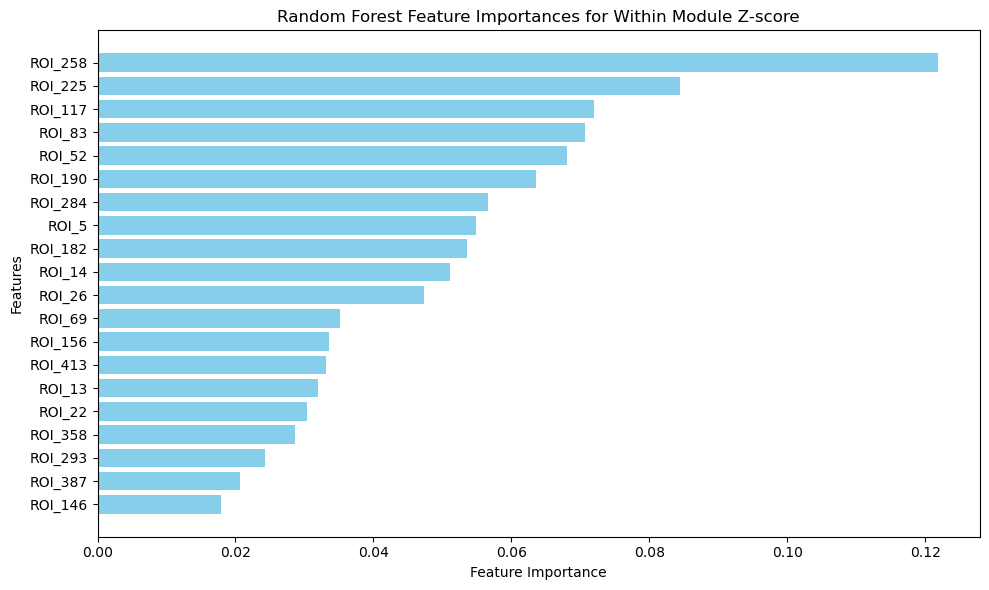

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a list of selected feature names
# Replace this with your actual list
selected_feature_names = X_train_selected.columns if isinstance(X_train_selected, pd.DataFrame) else [f'Feature_{i}' for i in range(X_train_selected.shape[1])]

# Get feature importances
importances = rf_selected.feature_importances_

# Create a DataFrame for easy plotting
feat_importances = pd.DataFrame({
    'Feature': selected_feature_names,
    'Importance': importances
})

# Sort by importance
feat_importances = feat_importances.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_importances['Feature'], feat_importances['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Feature Importances for Within Module Z-score')
plt.gca().invert_yaxis()  # Most important at the top
plt.tight_layout()
plt.savefig(os.path.join(base_dir, 'results/rf_features_WMZ.png'))
